![Alt text](https://www.saintpeters.edu/wp-content/uploads/blogs.dir/230/files/2022/11/SPU-Sesq-1.png)


# Student Information

<table style="width:100%">
  <tr>
    <td style="text-align:left"><font color="green"><b>Contributor 1:</b></font></td>
    <td style="text-align:left"><b>Jennifer Valencia</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Contributor 2:</b></font></td>
    <td style="text-align:left"><b>Joyail Tokas</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="purple"><b>Class:</b></font></td>
    <td style="text-align:left"><b>DS-600: Data Mining</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="orange"><b>Task:</b></font></td>
    <td style="text-align:left"><b>Capstone Project.</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="brown"><b>Topic:</b></font></td>
    <td style="text-align:left"><b>AI Powered Phishing Attack Detection</b></td>
  </tr>
</table>


# AI Powered Phishing Attack Detection

#### Business Needs:
Phishing attacks pose a significant threat to individuals and organizations by tricking victims into disclosing sensitive information. To combat this, there is a pressing need for an effective detection system that can differentiate between legitimate and phishing URLs.

#### Problem Statement:
Phishing is a type of anomaly that consists of malicious attacks intended to trick people into divulging sensitive information (Justindhas et. al., 2023). They are frequently formatted as URLs that mimic legitimate websites. Failure to identify these attacks can result in significant repercussions, such as identity theft, malware distribution, financial threats, and security breaches.

#### Objective:
This project will incorporate machine learning algorithms to identify potential phishing attempts through deceptive URLs. Some approaches to be explored include K-Means Clustering, DBSCAN, Support Vector Machine, and LDA. The models will be trained and tested using the PhiUSIIL Phishing URL Dataset from UC Irvine Machine Learning Repository, which comprises 134,850 legitimate and 100,945 phishing URLs. The performance of each of the models will be evaluated to determine which one achieves the highest accuracy when distinguishing between legitimate and illegitimate URLs.

#### References:
Justindhas, Y., Raghul, V., Pramadeish S., Prakash, S. (2024). A Comprehensive Review on An Ensemble-Based Machine Learning Approach for Phishing Website Detection. In 2024 2nd International Conference on Computer, Communication and Control (IC4), 1-6, https://ieeexplore.ieee.org/document/10486561

Prasad, A. & Chandra, S. (2024). PhiUSIIL Phishing URL (Website). UCI Machine Learning Repository. https://doi.org/10.1016/j.cose.2023.103545

#### Credits:
| Image                      | First Name | Last Name       | Student ID | Class Level |
|----------------------------|------------|-----------------|------------|-------------|
| <img src="../Media_Files/Jennifer_Valencia.jpeg" alt="Jennifer Valencia" width="100"/> | Jennifer   | Valencia      | 0865975    | Graduate    |
| <img src="../Media_Files/Joyail_Tokas.jpeg" alt="Joyail Tokas" width="100"/> | Joyail     | Tokas         | 1030128    | Graduate    |


---


## <span style="color:purple">📝 Task 1:</span> Data Acquisition & EDA Process

✅ Exploratory Data Analysis: Installing all the project required libraries

In [1]:
## Required Libraries 
import numpy as np # For Math/linear algebra
import pandas as pd # For Data processing
import io
from io import StringIO

## Data Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches 


## Time Series Data Libraries 
import datetime
from datetime import timedelta

## ML Metric Performance Library
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

##Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Markdown comments design 
from IPython.display import display, Markdown
import emoji
from IPython.core.display import display, HTML

# Ensure all output is displayed from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modify the CSS style of the output cell to manage the overflow
from IPython.display import display, HTML, Markdown
display(HTML("""
<style>
.output {
    display: block;
    max-height: 1800px; 
    overflow-y: auto;  
    overflow-x: auto; 
}
</style>
"""))

# Increase the maximum rows displayed in output
import pandas as pd
pd.set_option('display.max_rows', 1500)

## Label Encoding 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


C:\Users\jkval\anaconda3\anaconda\envs\tf2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


![Alt text](https://miro.medium.com/v2/resize:fit:1400/1*kEgCUgZmYnFXcZ253UiIDQ.png)

✅ Exploratory Data Analysis: Acquiring the dataset

In [2]:
# Read the dataset into a pandas DataFrame
phish = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
phish.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


Exploring a pandas DataFrame involves key methods for in-depth analysis:

- **data.describe():** Provides statistical summaries for numerical columns.
- **data.info():** Details the DataFrame's structure, data types, and missing values.
- **data.shape:** Shows the total number of rows and columns, indicating the dataset's size and scope.

![Alt text](https://res.cloudinary.com/practicaldev/image/fetch/s--uCYTIuwT--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/3hn73nplm0nv0ct18vg0.jpg)

## a)- Descriptive Analysis:

In [3]:
phish.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [4]:
def summarize_dataset(dataframe):
    """
    This function would summarize our exam pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be summarized.

    Returns:
    pd.DataFrame: DataFrame containing summary information including non-null counts and data types.
    pd.DataFrame: DataFrame containing the number of rows and columns.
    """
    # Extracting info as DataFrame
    info_df = pd.DataFrame(dataframe.dtypes).reset_index()
    info_df.columns = ['Column', 'Data Type']
    info_df['Non-Null Count'] = dataframe.notnull().sum().values

    # Creating a DataFrame for shape
    shape_df = pd.DataFrame({'Aspect': ['Number of Rows', 'Number of Columns'],
                             'Value': [dataframe.shape[0], dataframe.shape[1]]})

    return info_df, shape_df

# Applying the function to the loaded data
dataset_info_df, dataset_shape_df = summarize_dataset(phish)

In [5]:
dataset_info_df

,Column,Data Type,Non-Null Count
0,FILENAME,object,235795
1,URL,object,235795
2,URLLength,int64,235795
3,Domain,object,235795
4,DomainLength,int64,235795
5,IsDomainIP,int64,235795
6,TLD,object,235795
7,URLSimilarityIndex,float64,235795
8,CharContinuationRate,float64,235795
9,TLDLegitimateProb,float64,235795


In [6]:
dataset_shape_df

,Aspect,Value
0,Number of Rows,235795
1,Number of Columns,56


## b)- Detection and Treatment of MISSING DATA:

In [7]:
def count_null_values(dataframe):
    """
    Function to count null values in each column of a pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be analyzed.

    Returns:
    pd.DataFrame: DataFrame containing the count of null values in each column.
    """
    null_counts = dataframe.isnull().sum()
    null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
    null_counts_df = null_counts_df[null_counts_df['Null Count'] > 0].reset_index()
    null_counts_df.rename(columns={'index': 'Column'}, inplace=True)
    return null_counts_df

# Applying the function to the renamed data
null_counts_df = count_null_values(phish)
null_counts_df

,Column,Null Count


## C)- Exploratory Data Analysis (EDA)

In [8]:
def plot_histogram(dataframe, column, bins=30):
    """
    Plot a colorful histogram for a specific column with mean threshold.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    bins (int): Number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    mean_value = dataframe[column].mean()
    sns.histplot(dataframe[column], bins=bins, kde=True, color='dodgerblue', edgecolor='black')
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_countplot(dataframe, column):
    """
    Plot a colorful count plot for a specific column with legends.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_correlation_matrix(dataframe):
    """
    Plot an enhanced correlation matrix for the DataFrame.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    """
    plt.figure(figsize=(16, 12))
    corr = dataframe.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def plot_boxplot(dataframe, column):
    """
    Plot an enhanced boxplot for a specific column with mean threshold.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=column, palette='Set3')
    mean_value = dataframe[column].mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


def plot_pairplot(dataframe, columns):
    """
    Plot an enhanced pairplot for specific columns.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    columns (list): List of columns to plot.
    """
    pairplot = sns.pairplot(dataframe[columns], diag_kind='kde', palette='husl')
    pairplot.fig.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()


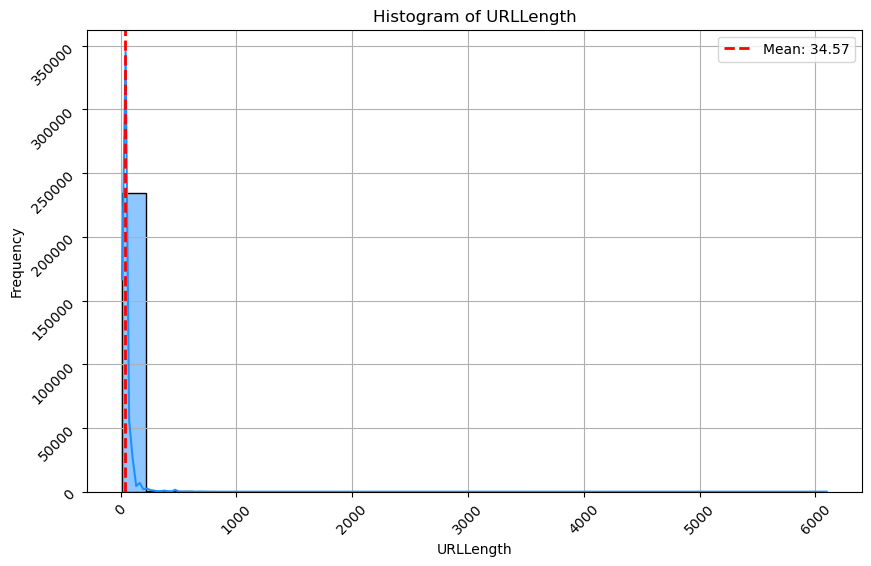

In [9]:
plot_histogram(phish, 'URLLength')

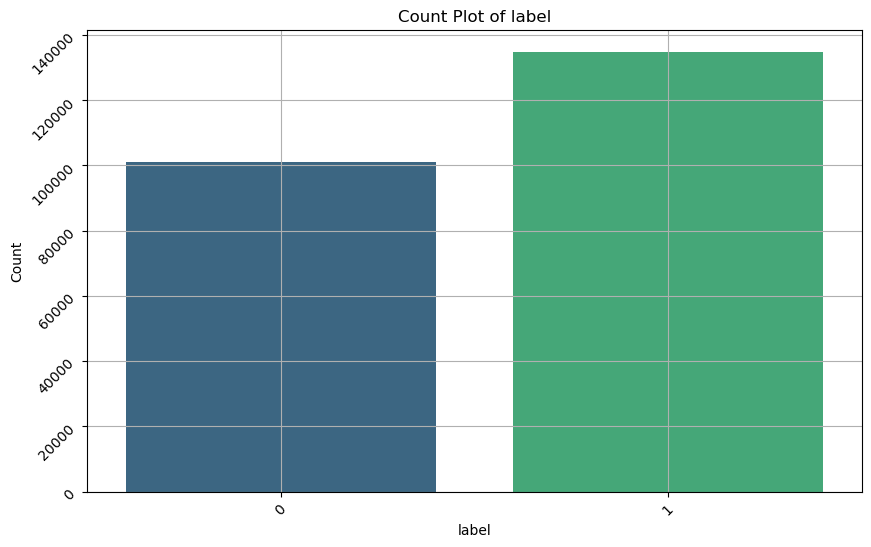

In [10]:
plot_countplot(phish, 'label')

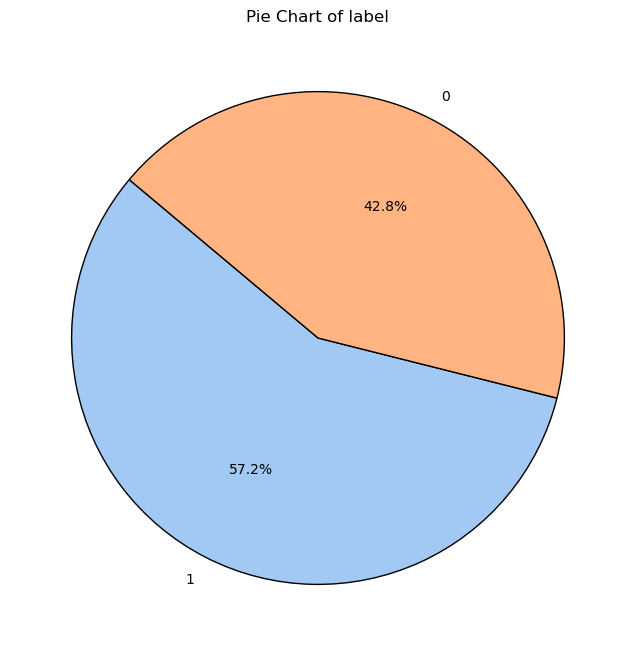

In [11]:
def plot_pie_chart(dataframe, column):
    """
    Plot a pie chart showing the percentage distribution of a specific column.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(8, 8))
    data = dataframe[column].value_counts()
    labels = data.index
    colors = sns.color_palette('pastel')[0:len(labels)]
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Pie Chart of {column}')
    plt.show()

plot_pie_chart(phish, 'label')


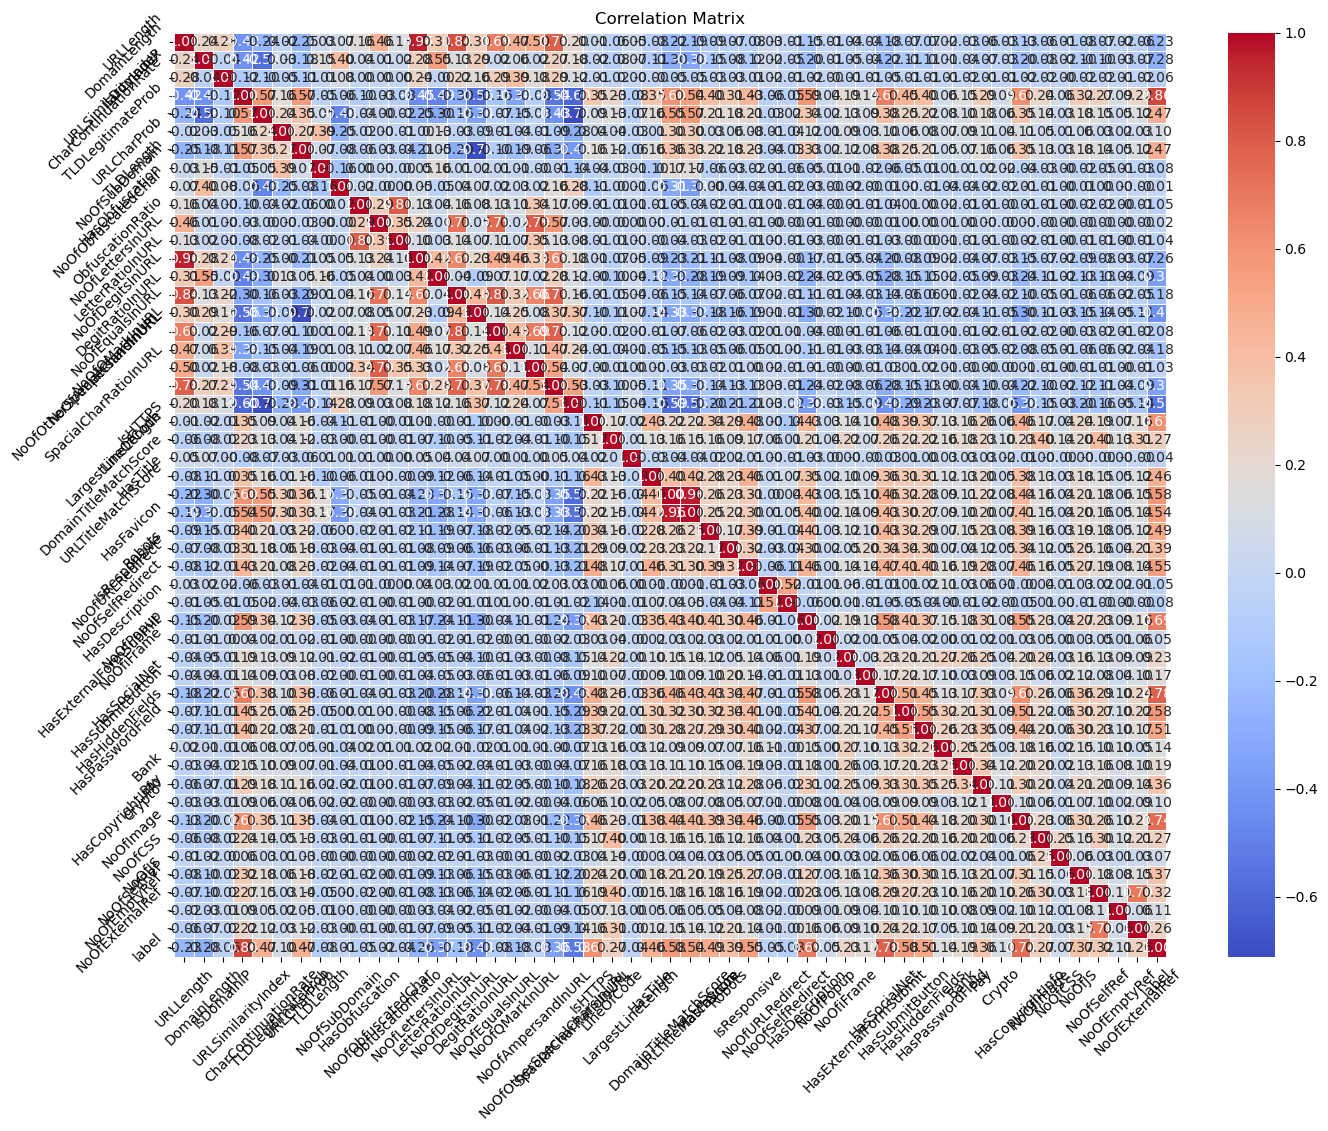

In [12]:
plot_correlation_matrix(phish)

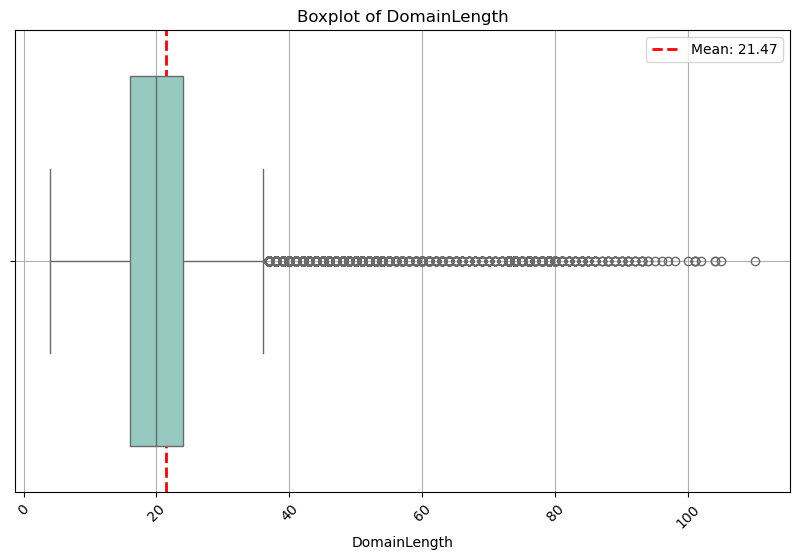

In [13]:
plot_boxplot(phish, 'DomainLength')

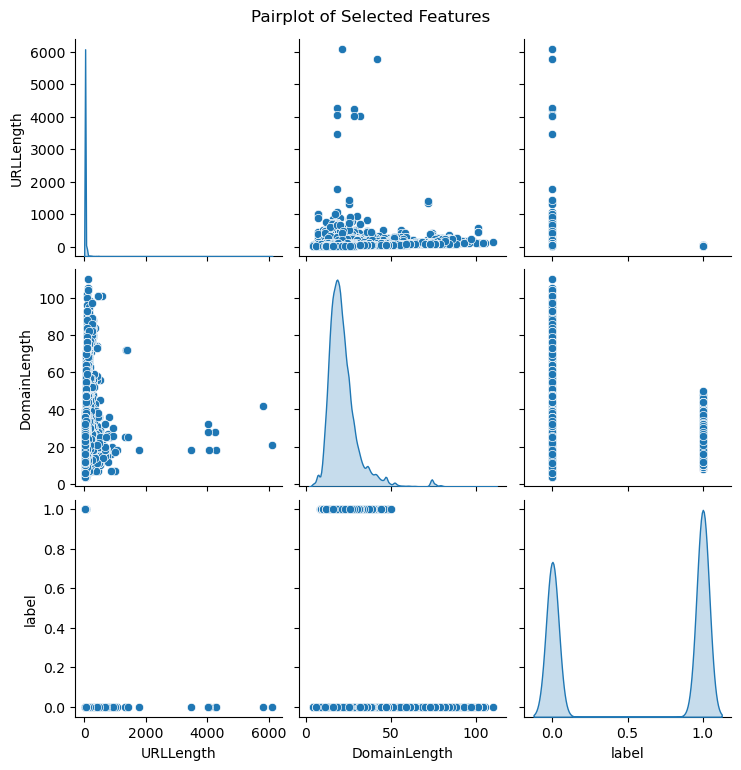

In [14]:
pairplot_columns = ['URLLength', 'DomainLength', 'label']
plot_pairplot(phish, pairplot_columns)

## d)- Feature Analysis

In [15]:
# Preprocess the dataset
def preprocess_data(dataframe):
    # Drop non-numeric columns that are not useful
    dataframe = dataframe.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD'])

    # Handle missing values
    dataframe.fillna(dataframe.median(), inplace=True)

    # Encode categorical columns if any
    label_encoder = LabelEncoder()
    for column in dataframe.select_dtypes(include=['object']).columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])

    return dataframe

In [16]:
# Preprocess the phish dataset
phish_preprocessed = preprocess_data(phish)

In [17]:
# Calculate and plot enhanced feature importance
def feature_importance(dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    return feature_importance_df

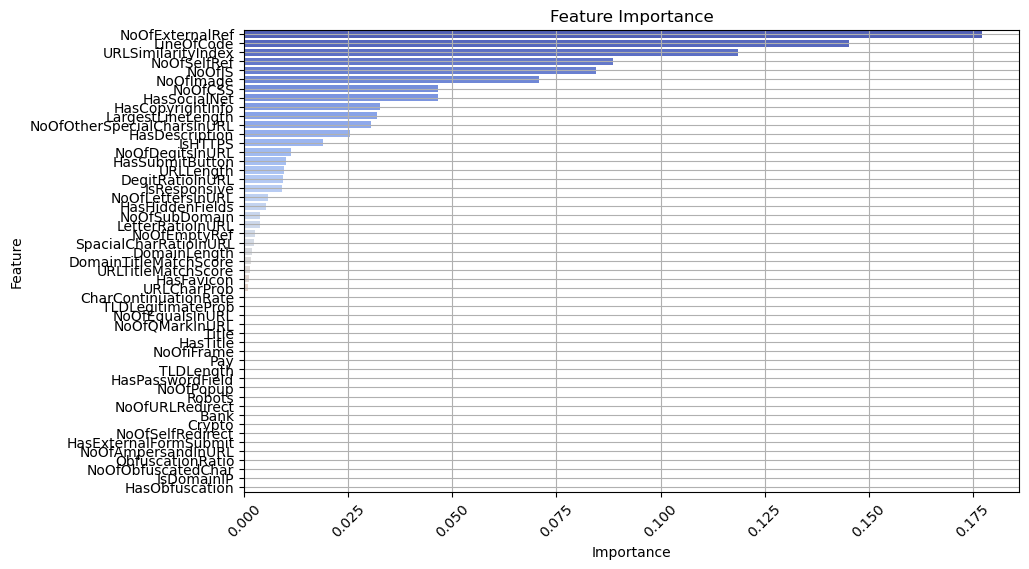

In [18]:
# Calculate and plot feature importance
feature_importance_df = feature_importance(phish_preprocessed, 'label')

## e)- Narrowing down the overall features

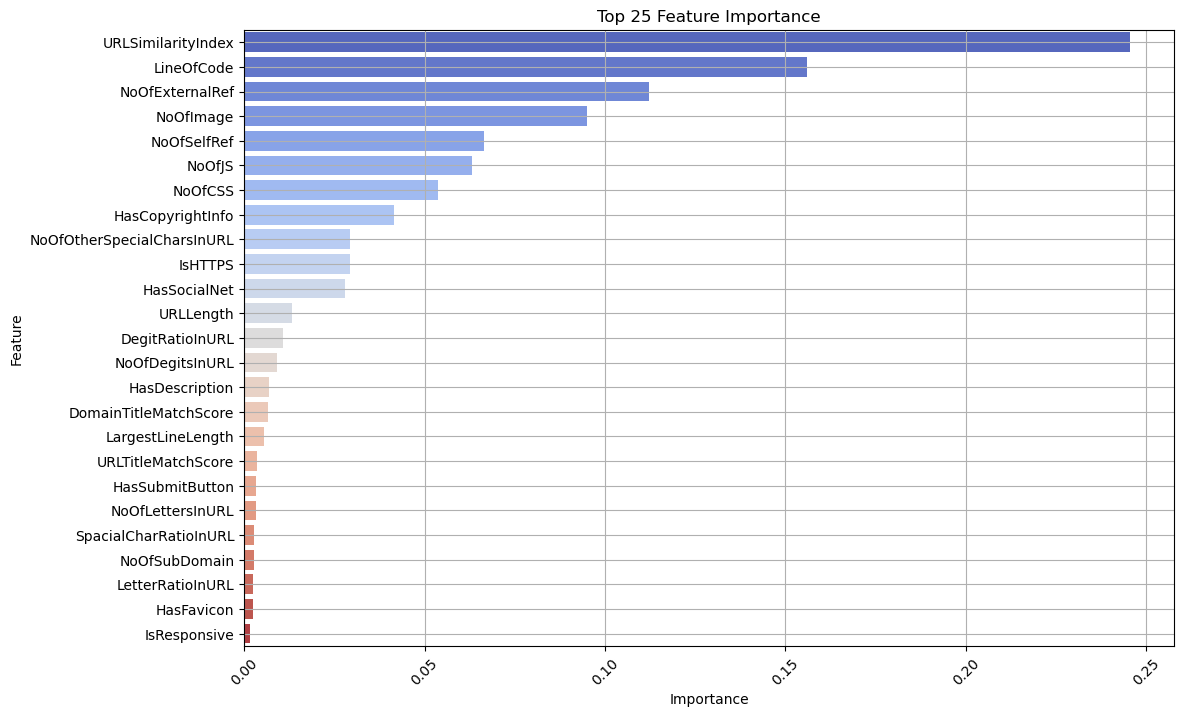

In [19]:
def feature_importance(dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(25)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
    plt.title('Top 25 Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    return feature_importance_df

# Calculate and plot top 25 feature importance
feature_importance_df = feature_importance(phish_preprocessed, 'label')
top_25_features = feature_importance_df['Feature'].tolist()


## f)- Create phish_df with Top 25 Features

In [20]:
# Create phish_df with top 25 features and the target column
phish_df = phish_preprocessed[top_25_features + ['label']]
phish_df.head()

,URLSimilarityIndex,LineOfCode,NoOfExternalRef,NoOfImage,NoOfSelfRef,NoOfJS,NoOfCSS,HasCopyrightInfo,NoOfOtherSpecialCharsInURL,IsHTTPS,...,LargestLineLength,URLTitleMatchScore,HasSubmitButton,NoOfLettersInURL,SpacialCharRatioInURL,NoOfSubDomain,LetterRatioInURL,HasFavicon,IsResponsive,label
0,100.0,558,124,34,119,28,20,1,1,1,...,9381,0.000000,1,18,0.032,1,0.581,0,1,1
1,100.0,618,217,50,39,8,9,1,2,1,...,9381,55.555556,1,9,0.087,1,0.391,1,0,1
2,100.0,467,5,10,42,7,2,1,2,1,...,682,46.666667,1,15,0.069,2,0.517,0,1,1
3,100.0,6356,31,3,22,15,27,1,1,1,...,26824,0.000000,1,13,0.038,1,0.500,0,1,1
4,100.0,6089,85,244,72,34,15,1,1,1,...,28404,100.000000,1,20,0.030,1,0.606,0,1,1


## g)- Visualize the New Heatmap

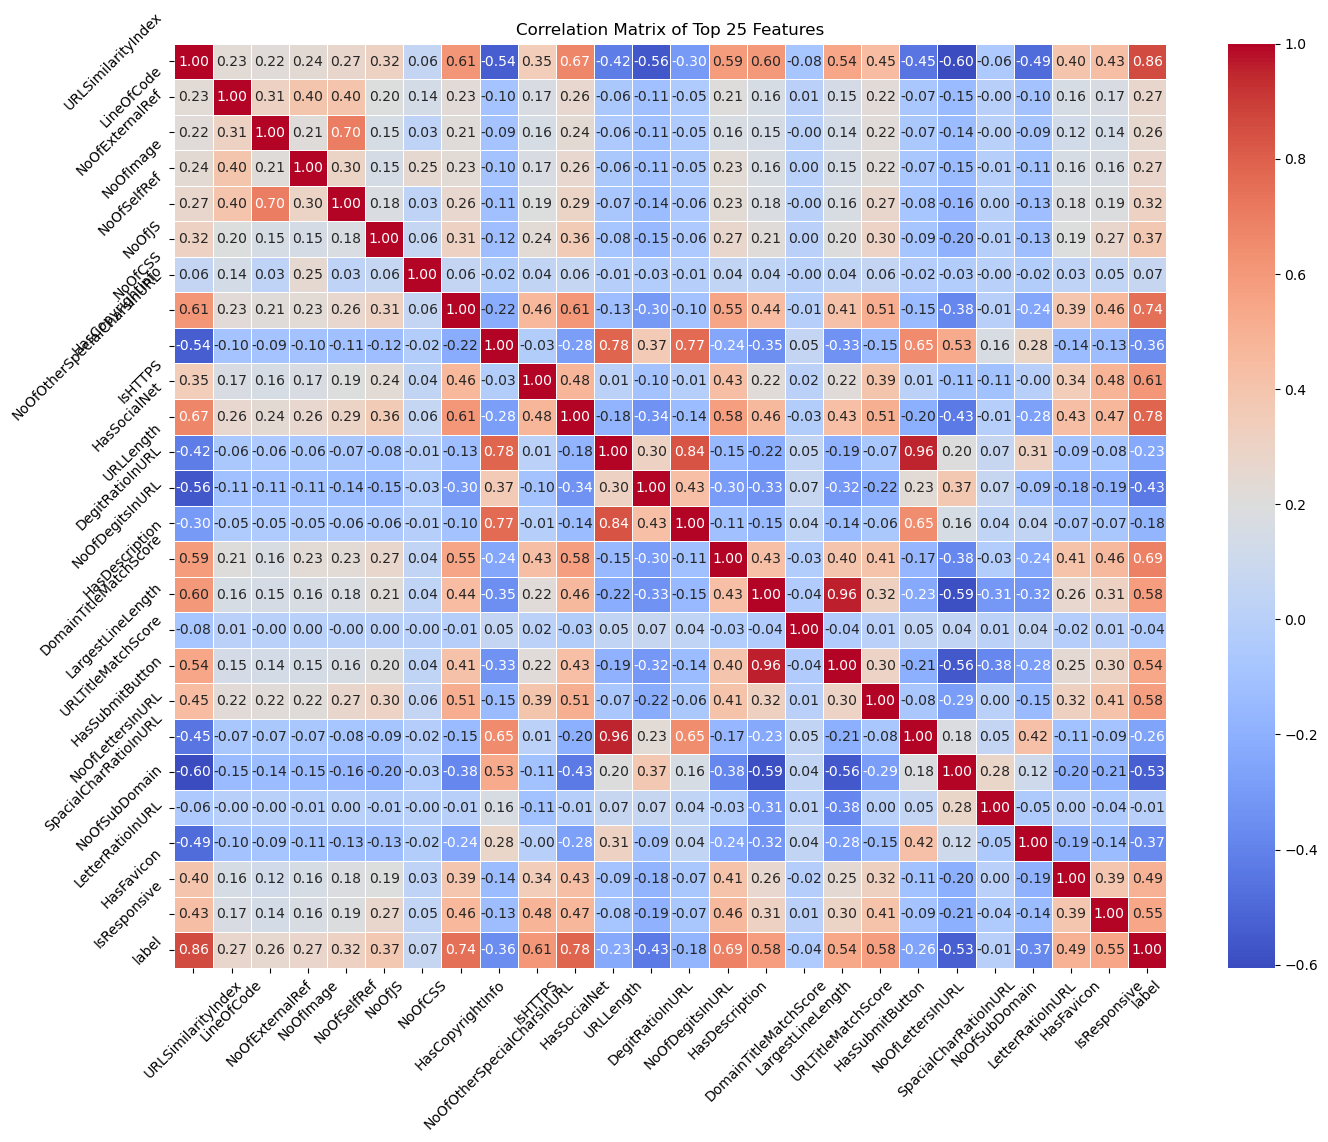

In [21]:
def plot_correlation_matrix(dataframe):
    plt.figure(figsize=(16, 12))
    corr = dataframe.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Top 25 Features')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

# Plot the new heatmap
plot_correlation_matrix(phish_df)


## <span style="color:purple">📝 Task 2:</span> Dataset Enrichment for Domain Name Scoring System


To enrich the dataset with a Domain Name Scoring System, we can use a combination of third-party libraries and APIs that provide security scores for domains. One popular library is pyhunter which interacts with the Hunter.io API for domain security information. Additionally, whois can provide domain registration information, and urlscan.io can provide detailed information about the safety of URLs.

## a)- Setting Up Libraries and APIs

First, we need to install the required libraries and set up API keys for any third-party services used.



In [22]:
!pip install pyhunter python-whois requests


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## b) Creating the Domain Name Scoring Function

We'll create a function that takes a domain, queries the APIs, and returns a safety score based on the responses. For demonstration purposes, I'll use a simplified scoring system. https://hunter.io/discover

## c)- Enriching the Dataset

We'll apply the scoring function to the domains in the dataset and add the scores as a new column. https://hunter.io/api-keys



In [23]:
import pandas as pd
import whois
import requests

# Sample API key for Hunter.io (Replace with your own API key)
HUNTER_API_KEY = '40e92fa12aa41c696a0ff807715c3867fc4b41a8'

def get_whois_info(domain):
    try:
        domain_info = whois.whois(domain)
        if domain_info:
            return domain_info
    except:
        return None

def get_hunter_info(domain):
    url = f'https://api.hunter.io/v2/domain-search?domain={domain}&api_key={HUNTER_API_KEY}'
    try:
        response = requests.get(url)
        data = response.json()
        if 'data' in data:
            return data['data']
    except:
        return None

def get_urlscan_info(domain):
    url = f'https://urlscan.io/api/v1/search/?q=domain:{domain}'
    try:
        response = requests.get(url)
        data = response.json()
        if 'results' in data:
            return data['results']
    except:
        return None

def domain_score(domain):
    score = 0
    whois_info = get_whois_info(domain)
    hunter_info = get_hunter_info(domain)
    urlscan_info = get_urlscan_info(domain)
    
    if whois_info:
        # Simplified scoring: score increases if the domain has a valid whois record
        score += 1
    
    if hunter_info:
        # Simplified scoring: score increases if Hunter.io finds domain information
        score += 1
    
    if urlscan_info:
        # Simplified scoring: score increases if URLScan.io finds scan results for the domain
        score += 1
    
    return score

# Load the initial dataset
file_path = 'PhiUSIIL_Phishing_URL_Dataset.csv'
phish = pd.read_csv(file_path)

# Extract the Domain column and compute the domain score
phish['Domain'] = phish['URL'].apply(lambda x: x.split('/')[2])
phish['Domain_Score'] = phish['Domain'].apply(domain_score)

# Display the enriched dataframe with domain scores
phish[['URL', 'Domain', 'Domain_Score']].head()

# Save the enriched dataframe
phish.to_csv('PhiUSIIL_Phishing_URL_Dataset_Enriched.csv', index=False)

## <span style="color:purple">📝 Task 3:</span> Pre- Model Deployment & Analysis  


__Model 1: KMeans Clustering__

In [42]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [25]:
kmeans_phish_df = phish_df.drop(columns='label',axis=1)

In [26]:
#Use the phish_df, without the label to incorporate PCA. Scale the data.
X = kmeans_phish_df
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

StandardScaler()

In [69]:
#Splitinto training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size = 0.2, random_state = 42)

In [28]:
#Using n_clusters =2 since this is a binary problem (phishing or legitimate)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state = 42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [29]:
#Visualizing the clusters. Must use PCA since there are 25 features.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train) 
kmeans_labels=kmeans.labels_

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Phishing Clusters Using KMeans')

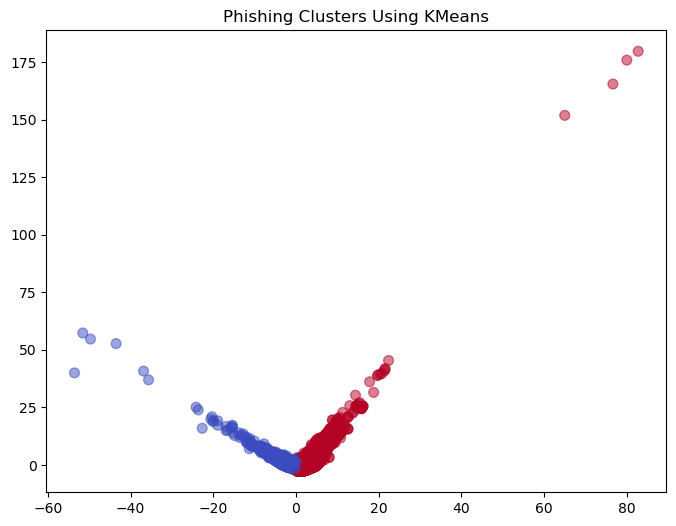

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='coolwarm', s=50, alpha=0.5)
plt.title('Phishing Clusters Using KMeans')
plt.show()

In [32]:
kmeans_sil_score = silhouette_score(X_train, kmeans_labels)
print(kmeans_sil_score)

0.308055795346402


In [70]:
kmeans_pred = kmeans.predict(X_test)

In [71]:
# Calculate metrics for KMeans
kmeans_mse = mean_squared_error(y_test, kmeans_pred)
kmeans_rse = np.sqrt(kmeans_mse)
kmeans_f1 = f1_score(y_test, kmeans_pred)
kmeans_precision = precision_score(y_test, kmeans_pred)
kmeans_accuracy = accuracy_score(y_test, kmeans_pred)
kmeans_roc_auc = roc_auc_score(y_test, kmeans_pred)

# Confusion matrix to calculate TPR and FPR for USRC
kmeans_cm = confusion_matrix(y_test, kmeans_pred)
tn, fp, fn, tp = kmeans_cm.ravel()
kmeans_tpr = tp / (tp + fn)
kmeans_fpr = fp / (fp + tn)
kmeans_usrc = (kmeans_tpr + (1 - kmeans_fpr)) / 2

print(f'KMeans Mean Squared Error: {kmeans_mse}')
print(f'KMeans Root Squared Error: {kmeans_rse}')
print(f'KMeans F1 Score: {kmeans_f1}')
print(f'KMeans Precision: {kmeans_precision}')
print(f'KMeans Accuracy: {kmeans_accuracy}')
print(f'KMeans ROC AUC: {kmeans_roc_auc}')
print(f'KMeans USRC: {kmeans_usrc}')
print("KMeans Confusion Matrix:\n", kmeans_cm)


KMeans Mean Squared Error: 0.9878072054114803
KMeans Root Squared Error: 0.9938849055154627
KMeans F1 Score: 0.014679131942975591
KMeans Precision: 0.01714172800474238
KMeans Accuracy: 0.01219279458851969
KMeans ROC AUC: 0.012082484563893265
KMeans USRC: 0.012082484563893265
KMeans Confusion Matrix:
 [[  228 19896]
 [26688   347]]


__Model 2. Support Vector Machine__

In [33]:
#import libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [72]:
X_svm = phish_df
y_svm = phish_df['label']

In [73]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size = 0.2, random_state = 42)

In [75]:
#Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [74]:
#Train the model using the training data
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [38]:
svm_pred = svm.predict(X_test_scaled)

In [78]:
# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rse = np.sqrt(svm_mse)
#svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])

# Confusion matrix to calculate TPR and FPR for USRC
svm_cm = confusion_matrix(y_test, svm_pred)
tn, fp, fn, tp = svm_cm.ravel()
svm_tpr = tp / (tp + fn)
svm_fpr = fp / (fp + tn)
svm_usrc = (svm_tpr + (1 - svm_fpr)) / 2

print(f'SVM Accuracy: {svm_accuracy}')
print(f'SVM Precision: {svm_precision}')
print(f'SVM F1 Score: {svm_f1}')
print(f'SVM Mean Squared Error (MSE): {svm_mse}')
print(f'SVM Root Squared Error (RSE): {svm_rse}')
#print(f'SVM ROC AUC: {svm_roc_auc}')
print(f'SVM USRC: {svm_usrc}')
print("SVM Confusion Matrix:\n", svm_cm)


SVM Accuracy: 0.9998303611187684
SVM Precision: 0.9997041748326739
SVM F1 Score: 0.999852065534968
SVM Mean Squared Error (MSE): 0.00016963888123157827
SVM Root Squared Error (RSE): 0.013024549175751852
SVM USRC: 0.9998012323593719
SVM Confusion Matrix:
 [[20116     8]
 [    0 27035]]


__Model 3. DBSCAN__

In [90]:
#import libraries
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report, mean_absolute_percentage_error
from sklearn.neighbors import NearestNeighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
dbscan_phish_df = phish_df.drop(columns='label', axis=1)

In [47]:
X = dbscan_phish_df

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
#Split into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [50]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

In [51]:
# Sort distances for the k-th nearest neighbor
distances = np.sort(distances, axis=0)
k_distances = distances[:, k-1]

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'k-distance')

Text(0.5, 0, 'Data Points sorted by distance')

Text(0.5, 1.0, 'K-Distance Graph')

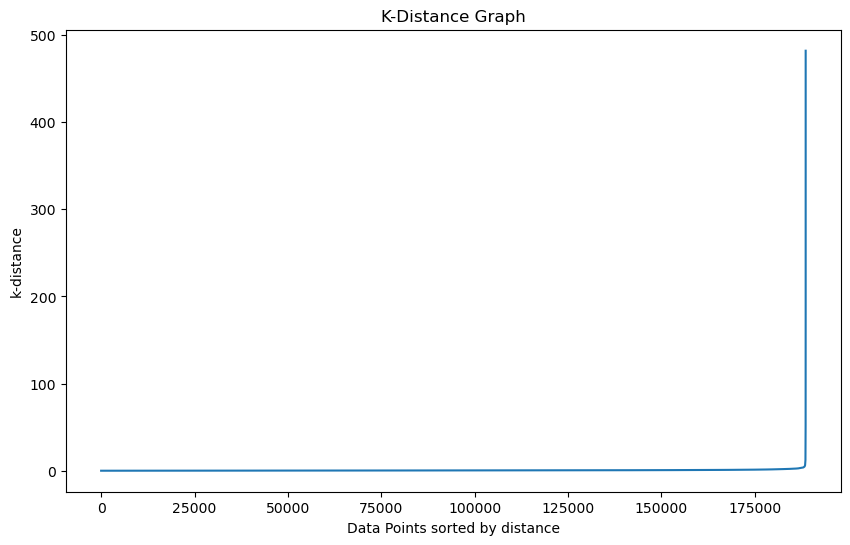

In [52]:
# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.ylabel('k-distance')
plt.xlabel('Data Points sorted by distance')
plt.title('K-Distance Graph')
plt.show()

In [53]:
# Set the value for eps based on the elbow plot
eps_value = 0.3
min_samples_value = 5

In [54]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

DBSCAN()

In [55]:
# Get the labels
dbscan_labels = dbscan.labels_


In [56]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_train)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Phishing Clusters using DBSCAN')

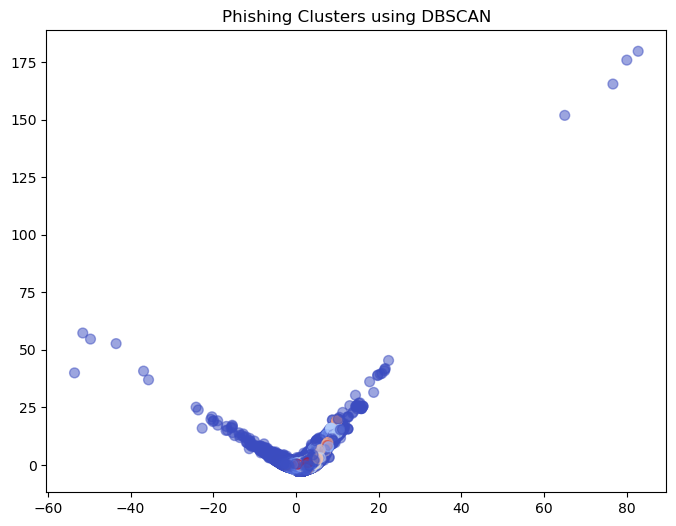

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=dbscan_labels, cmap='coolwarm', s=50, alpha=0.5)
plt.title('Phishing Clusters using DBSCAN')
plt.show()

In [58]:
# Calculate the silhouette score
sil_score = silhouette_score(X_train, dbscan_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: -0.14993719011126422


In [59]:
# Add DBSCAN labels to the training set
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['dbscan_labels'] = dbscan_labels


__Model 4. LDA__

In [81]:
# Preparing data for LDA
# Ensure to use numerical columns only
numerical_columns = phish_df.select_dtypes(include=[np.number]).columns.tolist()

In [82]:
# Splitting the dataset again with only numerical columns for LDA
X_numerical = phish_df[numerical_columns].drop(['label'], axis=1) # Drop the target column
y = phish_df['label'] # Target variable

In [83]:
# Split the data into training and testing sets for LDA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

In [84]:
# Train LDA model
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [85]:
# Predict on the test set
y_pred = lda.predict(X_test)

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC-ROC Curve')

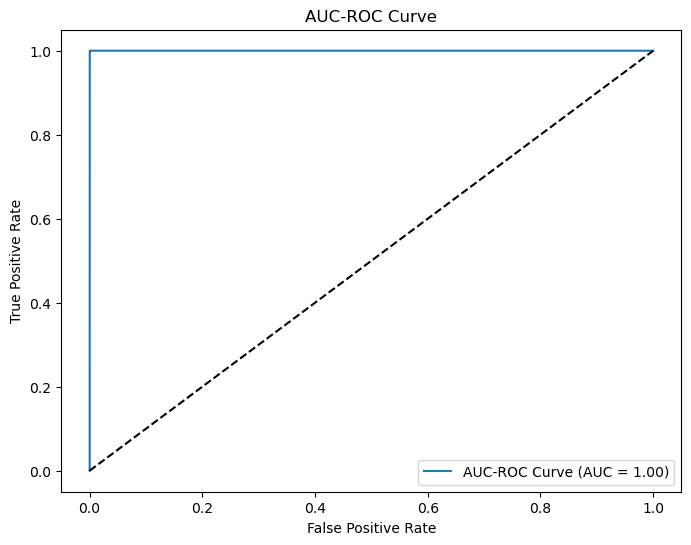

In [87]:
# Calculate AUC-ROC
y_pred_prob = lda.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

In [91]:
# User-defined accuracy and precision
user_accuracy = accuracy_score(y_test, y_pred)
user_precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAP)
map_error = mean_absolute_percentage_error(y_test, y_pred)

# Residual Sum of Squares (RSE)
rse = np.sum((y_test - y_pred) ** 2)
print(f'User-defined Accuracy: {user_accuracy:.4f}')
print(f'User-defined Precision: {user_precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Percentage Error (MAP): {map_error:.4f}')
print(f'Residual Sum of Squares (RSE): {rse:.4f}')

User-defined Accuracy: 0.9985
User-defined Precision: 0.9975
F1 Score: 0.9987
Mean Squared Error (MSE): 0.0015
Mean Absolute Percentage Error (MAP): 6589375819855.4727
Residual Sum of Squares (RSE): 69.0000


## <span style="color:purple">📝 Task 4:</span> Predictive Analysis  


In [94]:
pip install streamlit

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
    --------------------------------------- 0.1/8.6 MB 3.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.6 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.6 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.6 MB 2.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.6 MB 3.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.6 MB 2.9 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.6 MB 2.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.6 MB 2.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/8.6 MB 2.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.6 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.4/8.6 MB 2.6 MB/s eta 0:00:03
   ------ -------------

In [96]:
import streamlit as st
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
def predict_phishing(url):
    X_pred = vectorizer.transform([url])
    prediction = lda.transform(X_pred)
    return prediction[0][0] > prediction[0][1]

def main():
    st.title('Phishing URL Detector with LDA')
    url = st.text_input('Enter URL')

    if st.button('Check'):
        if url:
            is_phishing = predict_phishing(url)
            if is_phishing:
                st.error(f'The URL is a phishing URL!')
            else:
                st.success(f'The URL is not phishing.')
        else:
            st.warning('Please enter a URL.')


if __name__ == '__main__':
    main()
    


## <span style="color:purple">📝 Task 5:</span>  Final Conclusion
